<a href="https://colab.research.google.com/github/economicactivist/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
past_sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

mean_nums = past_sales.sum()/len(past_sales)

class get_stats:
  def __init__(self, arr):
    self.arr = arr
  def get_var(self, arr):
    self.arr = arr
    mean_of_arr = arr.sum()/len(arr)
    temp_arr = []
    for i in arr:
      dist_to_mean = (i - mean_of_arr)**2
      temp_arr.append(dist_to_mean)
      sum_of_temp = np.array(temp_arr).sum()
    return sum_of_temp/(len(arr) - 1)
  


In [243]:
np.var(past_sales, ddof=1)




214387.90476190473

In [244]:
get_stats(past_sales).get_var(past_sales)

214387.90476190473

In [245]:
var = get_stats(past_sales).get_var(past_sales)

np.sqrt(var)

463.0204150595357

In [246]:
np.std(past_sales, ddof=1)

463.0204150595357

In [0]:
sales_std = np.std(past_sales, ddof=1)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [248]:
num_customers = np.array([127, 80, 105, 92, 120, 115, 93])
sales_numOfCustMtrx = np.stack((past_sales, num_customers), axis=0)
sales_numOfCustMtrx


array([[3505, 2400, 3027, 2798, 3700, 3250, 2689],
       [ 127,   80,  105,   92,  120,  115,   93]])

In [249]:
np.cov(sales_numOfCustMtrx, ddof=1)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [0]:
sales_cov = np.cov(sales_numOfCustMtrx, ddof=1)


In [0]:
sales_cust_cov = 7604.35714286

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [251]:
np.sqrt(get_stats(num_customers).get_var(num_customers))

17.057326313123664

In [0]:
cust_std = np.sqrt(get_stats(num_customers).get_var(num_customers))

\begin{align}
r = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}}
\end{align}

In [279]:
sales_cust_cov/(sales_std*cust_std)   

0.9628339778152527

In [254]:
np.corrcoef(sales_numOfCustMtrx)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [255]:
sales_cust_cov

7604.35714286

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col=0)

In [257]:
df.select_dtypes(include='number')

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
1,1.0,1.0,29.000000,0.0,0.0,211.3375,NaN,1
2,1.0,1.0,0.916700,1.0,2.0,151.5500,NaN,1
3,1.0,0.0,2.000000,1.0,2.0,151.5500,NaN,1
4,1.0,0.0,30.000000,1.0,2.0,151.5500,135.0,1
5,1.0,0.0,25.000000,1.0,2.0,151.5500,NaN,1
...,...,...,...,...,...,...,...,...
1306,3.0,0.0,29.881135,1.0,0.0,14.4542,NaN,0
1307,3.0,0.0,26.500000,0.0,0.0,7.2250,304.0,0
1308,3.0,0.0,27.000000,0.0,0.0,7.2250,NaN,0
1309,3.0,0.0,29.000000,0.0,0.0,7.8750,NaN,0


In [0]:
titanic_nums = df.select_dtypes(include='number')

In [259]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

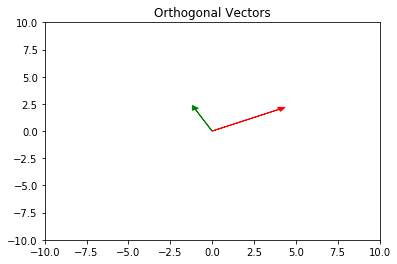

In [260]:
vector_1 = [4, 2]
vector_2 = [-1, 2]



# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.4, head_length=0.4, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.4, head_length=0.4, color ='green')
plt.xlim(-10,10)          
plt.ylim(-10,10)
plt.title("Orthogonal Vectors")
plt.show()

In [261]:
np.dot(vector_1,vector_2)  #confirmation

0

Orthogonal is synonymous with perpendicular.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [262]:
a = np.array([-5, 3, 7])  
b = np.array([6,-8,2])



np.sum(a*b)

-40

In [263]:
np.dot(a,b)

-40

The two vectors are not orthogonal because their dot product isn't zero

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

In [265]:
np.linalg.norm(c)**2

665.0

In [266]:
np.sum(c*c)

665

In [267]:
np.sum(c.T*c)

665

There all the same number (though different datatypes)

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \\ \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

-----------

\begin{align}
e = \begin{bmatrix} 2 \\ 11\\-8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0  \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\1  \end{bmatrix} = 2\hat{i} + 11\hat{j} -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [268]:
#The unit vector is v / |v|

np.array([4,12,11,9,2])/np.linalg.norm(np.array([4,12,11,9,2]))

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [0]:
unit_vec_f = np.array([4,12,11,9,2])/np.linalg.norm(np.array([4,12,11,9,2]))

In [270]:
#check that unit_vec_f is the unit vector of f by checking that the magnitude of unit_vec_f is 1

np.linalg.norm(unit_vec_f)



0.9999999999999999

In [0]:
#rounding error

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

###Linearly independent

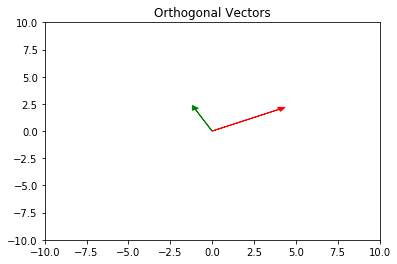

In [272]:
vector_a = [7, 1]
vector_b = [-3, 2]



# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.4, head_length=0.4, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.4, head_length=0.4, color ='green')
plt.xlim(-10,10)          
plt.ylim(-10,10)
plt.title("Orthogonal Vectors")
plt.show()

###Linearly Dependent

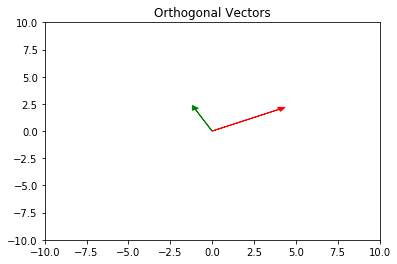

In [273]:
vector_c = [2, 2]
vector_d = [-4, -4]



# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.4, head_length=0.4, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.4, head_length=0.4, color ='green')
plt.xlim(-10,10)          
plt.ylim(-10,10)
plt.title("Orthogonal Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

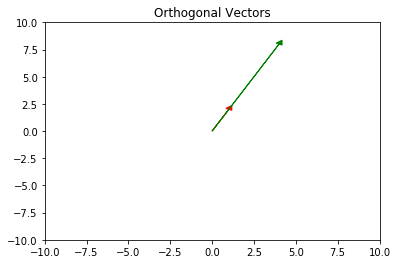

In [274]:
vector_g = [1,2]
vector_h = [4,8]



# Plot the Scaled Vectors
plt.arrow(0,0, vector_g[0], vector_g[1],head_width=.4, head_length=0.4, color ='red')
plt.arrow(0,0, vector_h[0], vector_h[1],head_width=.4, head_length=0.4, color ='green')
plt.xlim(-10,10)          
plt.ylim(-10,10)
plt.title("Orthogonal Vectors")
plt.show()

The vectors are linearly dependent and they span all of one-dimensional space

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

Based on my answer in 7.1, the vectors span all of three-dimensional space

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



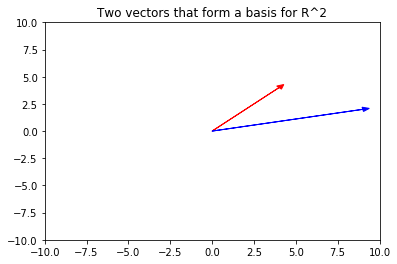

In [275]:

red = [4, 4]
blue = [9, 2]


plt.arrow(0, 0, red[0], red[1], head_width=.4, head_length=0.4, color = 'r')
plt.arrow(0, 0, blue[0], blue[1],  head_width=.4, head_length=0.4, color = 'b')
plt.title('Two vectors that form a basis for R^2')

plt.xlim(-10,10)          
plt.ylim(-10,10)
plt.show()

## 6.2 What does it mean to form a basis?

Every dimension can be expressed as a set of vectors.  Any set of vectors that describe a certain dimension can be called basis vectors of that dimension.  

if a set of vectors are any of the vectors that describe a particular dimension, then these vectors are basis vectors.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

### Add first row to second row

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

### Add -4 times the first row to the third row

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

### Multiply the second row by 1/2

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

### Multiply the third row by -1/10

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & 1
\end{bmatrix}
\end{align}

### The rank of P is 3

## 7.2 What does the rank of a matrix tell us?

It describes the dimensionality of the matrix formed by the combination vectors.  If the rank is equal to the number of vectors in the matrix (either column-wise or row-wise) then all vectors contained within the matrix are linearly independent.

# Linear Projections  (stretch goal)

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

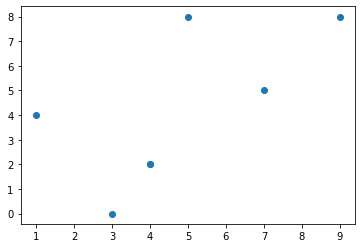

In [276]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()